# Loading the Packages

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
% matplotlib inline

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
import seaborn as sns

# Reading the Dataset and Doing Basics

In [11]:
air_crash = pd.read_csv('./Airplane_Crashes_and_Fatalities_Since_1908.csv',sep=',')

In [14]:
air_crash.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [17]:
air_crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
Date            5268 non-null object
Time            3049 non-null object
Location        5248 non-null object
Operator        5250 non-null object
Flight #        1069 non-null object
Route           3562 non-null object
Type            5241 non-null object
Registration    4933 non-null object
cn/In           4040 non-null object
Aboard          5246 non-null float64
Fatalities      5256 non-null float64
Ground          5246 non-null float64
Summary         4878 non-null object
dtypes: float64(3), object(10)
memory usage: 535.1+ KB


# Checking for Null Values

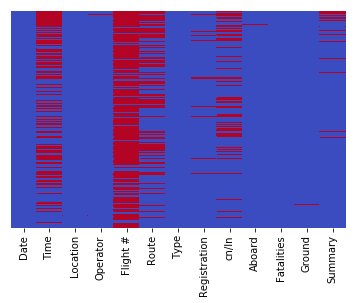

In [18]:
sns.heatmap(air_crash.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

Time to get to work and fix it all up.

# Focusing on the Accidents

In [19]:
operator = air_crash[['Operator','Fatalities']].groupby('Operator').agg(['sum','count'])

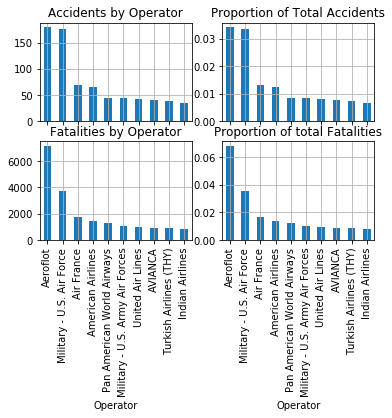

In [20]:
fig_ops,((ax1, ax2), (ax3, ax4))=plt.subplots(2,2,sharex=True)
accidents = operator['Fatalities','count'].sort_values(ascending=False)
totalacc = accidents.sum()
accprop = accidents/totalacc
accidents.head(10).plot(kind='bar',title='Accidents by Operator',ax=ax1,grid=True,rot=90)
accprop.head(10).plot(kind='bar',title='Proportion of Total Accidents',ax=ax2,grid=True,rot=90)

fatalities = operator['Fatalities','sum'].sort_values(ascending=False)
fatalities.head(10).plot(kind='bar',title='Fatalities by Operator',ax=ax3,grid=True,rot=90)
totalfatal = fatalities.sum()
fatalprop = fatalities/totalfatal
fatalprop.head(10).plot(kind='bar',title='Proportion of total Fatalities',ax=ax4,grid=True,rot=90)

# Fatalities per Accident

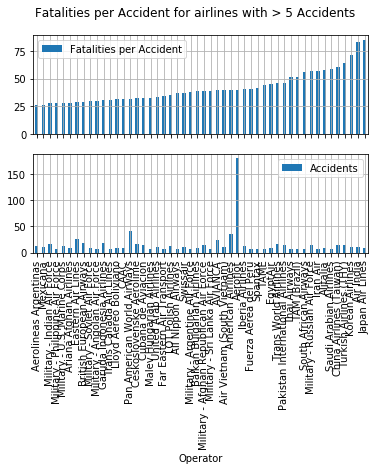

In [23]:
fatal = operator['Fatalities'].reset_index()
fatal['Fatalities per Crash'] = fatal['sum']/fatal['count']
fatal.columns = ['Operator','Fatalities','Accidents','Fatalities per Accident']

fig_p,(axp1,axp2) = plt.subplots(2,1,sharex = True)
minacc = 5
fig_p.suptitle('Fatalities per Accident for airlines with > %s Accidents' % minacc)
propsplot = fatal[fatal['Accidents']>minacc]
propsplot.sort_values('Fatalities per Accident').tail(50).plot(x = 'Operator'
                                                               , y = 'Fatalities per Accident'
                                                               , ax = axp1
                                                               , kind = 'bar'
                                                               , grid = True)
propsplot.sort_values('Fatalities per Accident').tail(50).plot(x = 'Operator'
                                                               , y = 'Accidents'
                                                               , ax = axp2
                                                               , kind = 'bar'
                                                               , grid = True)

# Generating Linear Model

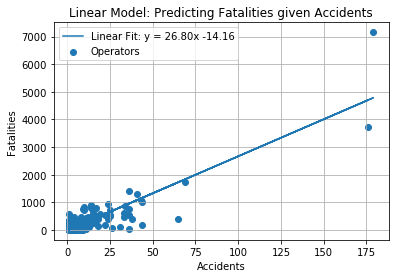

In [24]:
operator.dropna(inplace=True)
X = operator['Fatalities','count']
Y = operator['Fatalities','sum']
model = LinearRegression()
model.fit(X.values.reshape(-1,1),Y.values.reshape(-1,1))
m = model.coef_[0][0]
c = model.intercept_[0]

fig_fit,axd=plt.subplots()
axd.scatter(X,Y,label='Operators')
axd.set_title('Linear Model: Predicting Fatalities given Accidents')
axd.plot(X,model.predict(X.values.reshape(-1,1)),label='Linear Fit: y = %2.2fx %2.2f' % (m,c))
axd.grid(True)
axd.set_xlabel('Accidents')
axd.set_ylabel('Fatalities')
axd.legend(loc=2)

# More Subplots

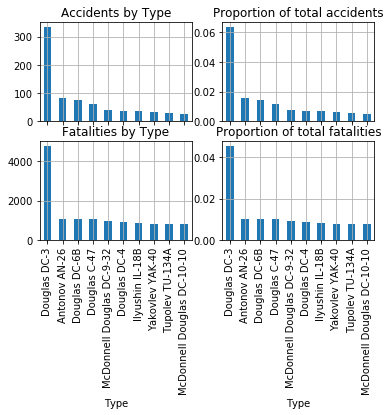

In [27]:
types = frame[['Type','Fatalities']].groupby('Type').agg(['sum','count'])

fig_type,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex = True)
acc_type = types['Fatalities','count'].sort_values(ascending=False)
acc_type.head(10).plot(kind='bar',title='Accidents by Type',grid=True,ax=ax1,rot=90)
typeprop = acc_type/totalacc
typeprop.head(10).plot(kind='bar',title='Proportion of total accidents',grid=True,ax=ax2,rot=90)

fatal_type = types['Fatalities','sum'].sort_values(ascending=False)
fatal_type.head(10).plot(kind='bar',title='Fatalities by Type',grid=True,ax=ax3,rot=90)
typefatalprop = fatal_type/totalfatal
typefatalprop.head(10).plot(kind='bar',title='Proportion of total fatalities',grid=True,ax=ax4,rot=90)

# On an Annual Basis

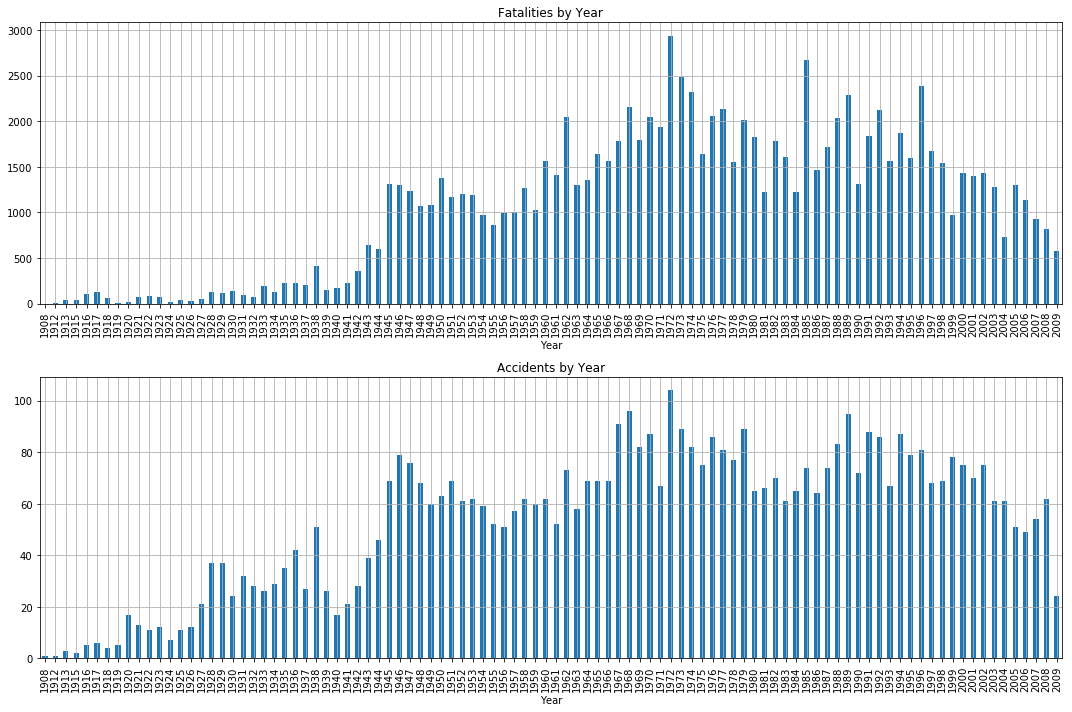

In [31]:
frame['Year'] = frame['Date'].apply(lambda x: int(str(x)[-4:]))
yearly = frame[['Year','Fatalities']].groupby('Year').agg(['sum','count'])

fig_yearly,(axy1,axy2)=plt.subplots(2,1,figsize=(15,10))
yearly['Fatalities','sum'].plot(kind='bar',title='Fatalities by Year',grid=True,ax=axy1,rot=90)
yearly['Fatalities','count'].plot(kind='bar',title='Accidents by Year',grid=True,ax=axy2,rot=90)
plt.tight_layout()

# Looking at Different Operator

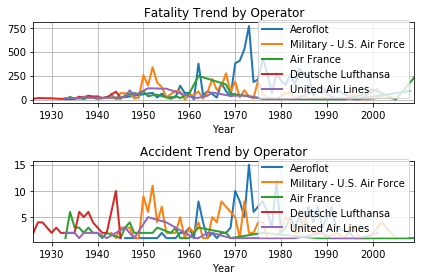

In [32]:
interestingOps = accidents.index.values.tolist()[0:5]
optrend = frame[['Operator','Year','Fatalities']].groupby(['Operator','Year']).agg(['sum','count'])
ops = optrend['Fatalities'].reset_index()
fig,axtrend = plt.subplots(2,1)
for op in interestingOps:
    ops[ops['Operator']==op].plot(x='Year',y='sum',ax=axtrend[0],grid=True,linewidth=2)
    ops[ops['Operator']==op].plot(x='Year',y='count',ax=axtrend[1],grid=True,linewidth=2)

axtrend[0].set_title('Fatality Trend by Operator')
axtrend[1].set_title('Accident Trend by Operator')
linesF, labelsF = axtrend[0].get_legend_handles_labels()
linesA, labelsA = axtrend[1].get_legend_handles_labels()
axtrend[0].legend(linesF,interestingOps)
axtrend[1].legend(linesA,interestingOps)
plt.tight_layout()

# Looking at Different Locations

In [33]:
s = frame['Location'].str[0:].str.split(',', expand=True)
frame['Country'] = s[3].fillna(s[2]).fillna(s[1]).str.strip()
#I've pulled out all the US states so as to be able to assign them a country
usNames = ['Virginia','New Jersey','Ohio','Pennsylvania', 'Maryland', 'Indiana', 'Iowa',
          'Illinois','Wyoming', 'Minnisota', 'Wisconsin', 'Nevada', 'NY','California',
          'WY','New York','Oregon', 'Idaho', 'Connecticut','Nebraska', 'Minnesota', 'Kansas',
          'Texas', 'Tennessee', 'West Virginia', 'New Mexico', 'Washington', 'Massachusetts',
          'Utah', 'Ilinois','Florida', 'Michigan', 'Arkansas','Colorado', 'Georgia''Missouri',
          'Montana', 'Mississippi','Alaska','Jersey', 'Cailifornia', 'Oklahoma','North Carolina',
          'Kentucky','Delaware','D.C.','Arazona','Arizona','South Dekota','New Hampshire','Hawaii',
          'Washingon','Massachusett','Washington DC','Tennesee','Deleware','Louisiana',
          'Massachutes', 'Louisana', 'New York (Idlewild)','Oklohoma','North Dakota','Rhode Island',
          'Maine','Alakska','Wisconson','Calilfornia','Virginia','Virginia.','CA','Vermont',
          'HI','AK','IN','GA','Coloado','Airzona','Alabama','Alaksa' 
          ]

# Cleaning Up the Countries

In [35]:
afNames = ['Afghanstan'] #Afghanistan
anNames = ['off Angola'] #Angola
ausNames = ['Qld. Australia','Queensland  Australia','Tasmania','off Australia'] #Australia
argNames = ['Aregntina'] #Argentina
azNames = ['Azores (Portugal)'] #Azores
baNames = ['Baangladesh'] #Bangladesh
bahNames = ['Great Inagua'] #Bahamas
berNames = ['off Bermuda'] #Bermuda
bolNames = ['Boliva','BO'] #Bolivia
bhNames = ['Bosnia-Herzegovina'] #Bosnia Herzegovina
bulNames = ['Bugaria','Bulgeria'] #Bulgaria
canNames = ['British Columbia', 'British Columbia Canada','Canada2',
            'Saskatchewan','Yukon Territory'] #Canada
camNames = ['Cameroons','French Cameroons'] #Cameroon
caNames = ['Cape Verde Islands'] #Cape Verde
chNames = ['Chili'] #Chile
coNames = ['Comoro Islands', 'Comoros Islands'] #Comoros
djNames = ['Djbouti','Republiof Djibouti'] #Djibouti
domNames = ['Domincan Republic', 'Dominica'] #Dominican Republic
drcNames = ['Belgian Congo','Belgian Congo (Zaire)','Belgium Congo'
           'DR Congo','DemocratiRepubliCogo','DemocratiRepubliCongo',
            'DemocratiRepubliof Congo','DemoctratiRepubliCongo','Zaire',
           'Zaïre'] #Democratic Republic of Congo
faNames = ['French Equitorial Africa'] #French Equatorial Africa
gerNames = ['East Germany','West Germany'] #Germany
grNames = ['Crete'] #Greece
haNames = ['Hati'] #Haiti
hunNames = ['Hunary'] #Hungary
inNames = ['Indian'] #India
indNames = ['Inodnesia','Netherlands Indies'] #Indonesia
jamNames = ['Jamacia'] #Jamaica
malNames = ['Malaya'] #Malaysia
manNames = ['Manmar'] #Myanmar
marNames = ['Mauretania'] #Mauritania
morNames = ['Morrocco','Morroco'] #Morocco
nedNames = ['Amsterdam','The Netherlands'] #Netherlands
niNames = ['Niger'] #Nigeria
philNames = ['Philipines','Philippine Sea', 'Phillipines',
            'off the Philippine island of Elalat'] #Philippines
romNames = ['Romainia'] #Romania
rusNames = ['Russian','Soviet Union','USSR'] #Russia
saNames = ['Saint Lucia Island'] #Saint Lucia
samNames = ['Western Samoa'] #Samoa
siNames = ['Sierre Leone'] #Sierra Leone
soNames = ['South Africa (Namibia)'] #South Africa
surNames = ['Suriname'] #Surinam
uaeNames = ['United Arab Emirates'] #UAE
ukNames = ['England', 'UK','Wales','110 miles West of Ireland'] #United Kingdom
uvNames = ['US Virgin Islands','Virgin Islands'] #U.S. Virgin Islands
wkNames = ['325 miles east of Wake Island']#Wake Island
yuNames = ['Yugosalvia'] #Yugoslavia
zimNames = ['Rhodesia', 'Rhodesia (Zimbabwe)'] #Zimbabwe

clnames = []
for country in frame['Country'].values:
    if country in afNames:
        clnames.append('Afghanistan')
    elif country in anNames:
        clnames.append('Angola')
    elif country in ausNames:
        clnames.append('Australia')
    elif country in argNames:
        clnames.append('Argentina')
    elif country in azNames:
        clnames.append('Azores')
    elif country in baNames:
        clnames.append('Bangladesh')
    elif country in bahNames:
        clnames.append('Bahamas')
    elif country in berNames:
        clnames.append('Bermuda')
    elif country in bolNames:
        clnames.append('Bolivia')
    elif country in bhNames:
        clnames.append('Bosnia Herzegovina')
    elif country in bulNames:
        clnames.append('Bulgaria')
    elif country in canNames:
        clnames.append('Canada')
    elif country in camNames:
        clnames.append('Cameroon')
    elif country in caNames:
        clnames.append('Cape Verde')
    elif country in chNames:
        clnames.append('Chile')
    elif country in coNames:
        clnames.append('Comoros')
    elif country in djNames:
        clnames.append('Djibouti')
    elif country in domNames:
        clnames.append('Dominican Republic')
    elif country in drcNames:
        clnames.append('Democratic Republic of Congo')
    elif country in faNames:
        clnames.append('French Equatorial Africa')
    elif country in gerNames:
        clnames.append('Germany')
    elif country in grNames:
        clnames.append('Greece')
    elif country in haNames:
        clnames.append('Haiti')
    elif country in hunNames:
        clnames.append('Hungary')
    elif country in inNames:
        clnames.append('India')
    elif country in jamNames:
        clnames.append('Jamaica')
    elif country in malNames:
        clnames.append('Malaysia')
    elif country in manNames:
        clnames.append('Myanmar')
    elif country in marNames:
        clnames.append('Mauritania')
    elif country in morNames:
        clnames.append('Morocco')
    elif country in nedNames:
        clnames.append('Netherlands')
    elif country in niNames:
        clnames.append('Nigeria')
    elif country in philNames:
        clnames.append('Philippines')
    elif country in romNames:
        clnames.append('Romania')
    elif country in rusNames:
        clnames.append('Russia')
    elif country in saNames:
        clnames.append('Saint Lucia')
    elif country in samNames:
        clnames.append('Samoa')
    elif country in siNames:
        clnames.append('Sierra Leone')
    elif country in soNames:
        clnames.append('South Africa')
    elif country in surNames:
        clnames.append('Surinam')
    elif country in uaeNames:
        clnames.append('UAE')
    elif country in ukNames:
        clnames.append('United Kingdom')
    elif country in usNames:
        clnames.append('United States of America')
    elif country in uvNames:
        clnames.append('U.S. Virgin Islands')
    elif country in wkNames:
        clnames.append('Wake Island')
    elif country in yuNames:
        clnames.append('Yugoslavia')
    elif country in zimNames:
        clnames.append('Zimbabwe')
    else:
        clnames.append(country)
        
frame['Cleaned Country'] = clnames        
fatalcountries = frame[['Fatalities','Cleaned Country']].groupby(['Cleaned Country']).agg('sum')
fatalcountries['Proportion of Total'] = fatalcountries['Fatalities']/totalfatal


# Word Analysis

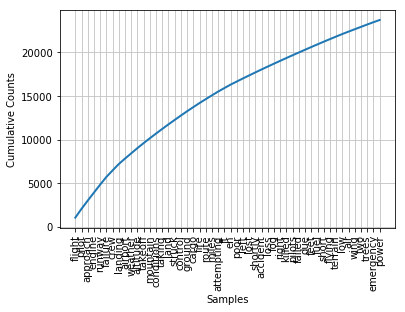

In [39]:
from nltk import FreqDist
from nltk.corpus import stopwords
import string

def remove_punctuation(s):
    exclude = set(string.punctuation)
    s = ''.join([i for i in s if i not in exclude])
    return s

stop = stopwords.words('english')
stop.append('plane')
stop.append('crashed')
stop.append('aircraft')

t = frame[['Summary','Fatalities']].dropna()
book = t['Summary'].str.lower().apply(remove_punctuation).str.split().values.sum()
wrd = [w for w in book if w not in stop]

fdist = FreqDist(wrd)
fdist.plot(50,cumulative = True)

# Bigrams

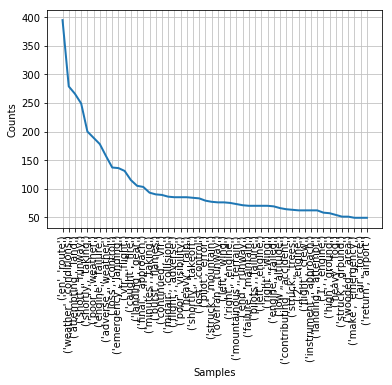

In [40]:
from nltk import bigrams

bigrams = list(bigrams(wrd))
fdistBigram = FreqDist(bigrams)
fdistBigram.plot(50)